In [29]:
subglobal = ['SYR','COL','AFG','COG','SSD','SOM','VEN','ETH','SDN','NGA',
             'IRQ','YEM','UKR','MMR','CAF','CMR','ERI','BDI','GEO','MLI',
             'TCD','LBY','NER','BFA','COD']

import pandas as pd
from time import time
import os
import json
import pickle
import numpy as np 
from time import time
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
start_time = time()
with open("../configuration.json", 'rt') as infile:
    config = json.load(infile)


sources = [os.path.join("..", config['paths']['output'], 
                        d['name'], 
                        'data.csv') for d in config['sources'] if d['name']]


# Generate a data frame with all indicators
df = pd.concat((pd.read_csv(f) for f in sources), sort=False, ignore_index=True)

# Summary stats
print("Sources            : {}".format(len(sources)))
print("Shape              : {} (rows) {} (columns)".format(*df.shape))
print("Geographies        : {}".format(len(df['Country Name'].unique())))
print("Indicators         : {}".format(len(df['Indicator Code'].unique())))
print("Temporal coverage  : {} -> {}".format(df.year.min(), df.year.max()))
print("Null values        : {}".format(sum(df['value'].isnull())))

print("\nLoaded data in {:3.2f} sec.".format(time() - start_time))


# Now arrange data in wide form
data = pd.pivot_table(df, index=['Country Code', 'year'],
                      columns='Indicator Code', values='value')

# Consider country/year as features (and not an index)
data.reset_index(inplace=True)

print("Long form of size  : {} (rows) {} (columns)".format(*data.shape))

Sources            : 19
Shape              : 924558 (rows) 6 (columns)
Geographies        : 568
Indicators         : 142
Temporal coverage  : 1789 -> 2019
Null values        : 1421

Loaded data in 1.37 sec.
Long form of size  : 35901 (rows) 144 (columns)


In [31]:
# Only look at features used in scenarios
groupings = json.load(open("../groupings.json", 'rt'))
featureset = [i['code'] for c in groupings['clusters'] for i in c['indicators']]

# Dimensions of interest
CLUSTERS = groupings['clusters']
COUNTRIES = ['subglobal', 'AFG', 'MMR']
LAGS = [0, 1]
LABELS = ['-10%', '-5%', '0%', '+5%', '+10%']

In [35]:
INDICATORS = [i['code'] for C in CLUSTERS for i in C['indicators']]

['NY.GDP.PCAP.PP.CD',
 'FP.CPI.TOTL.ZG',
 'SL.UEM.TOTL.ZS',
 'VC.BTL.DETH',
 'UC.EVT.TOT',
 'UC.FAT.CIV',
 'TRI.CORR.INDEX',
 'HR.SCR.MEAN',
 'FSI.STA.LEG',
 'FSI.PUB.SER',
 'EMDAT.NAT.OCCURRENCE',
 'EMDAT.NAT.TOTAL.AFFECTED',
 'ADESA',
 'SP.POP.GROW',
 'SP.URB.GROW']

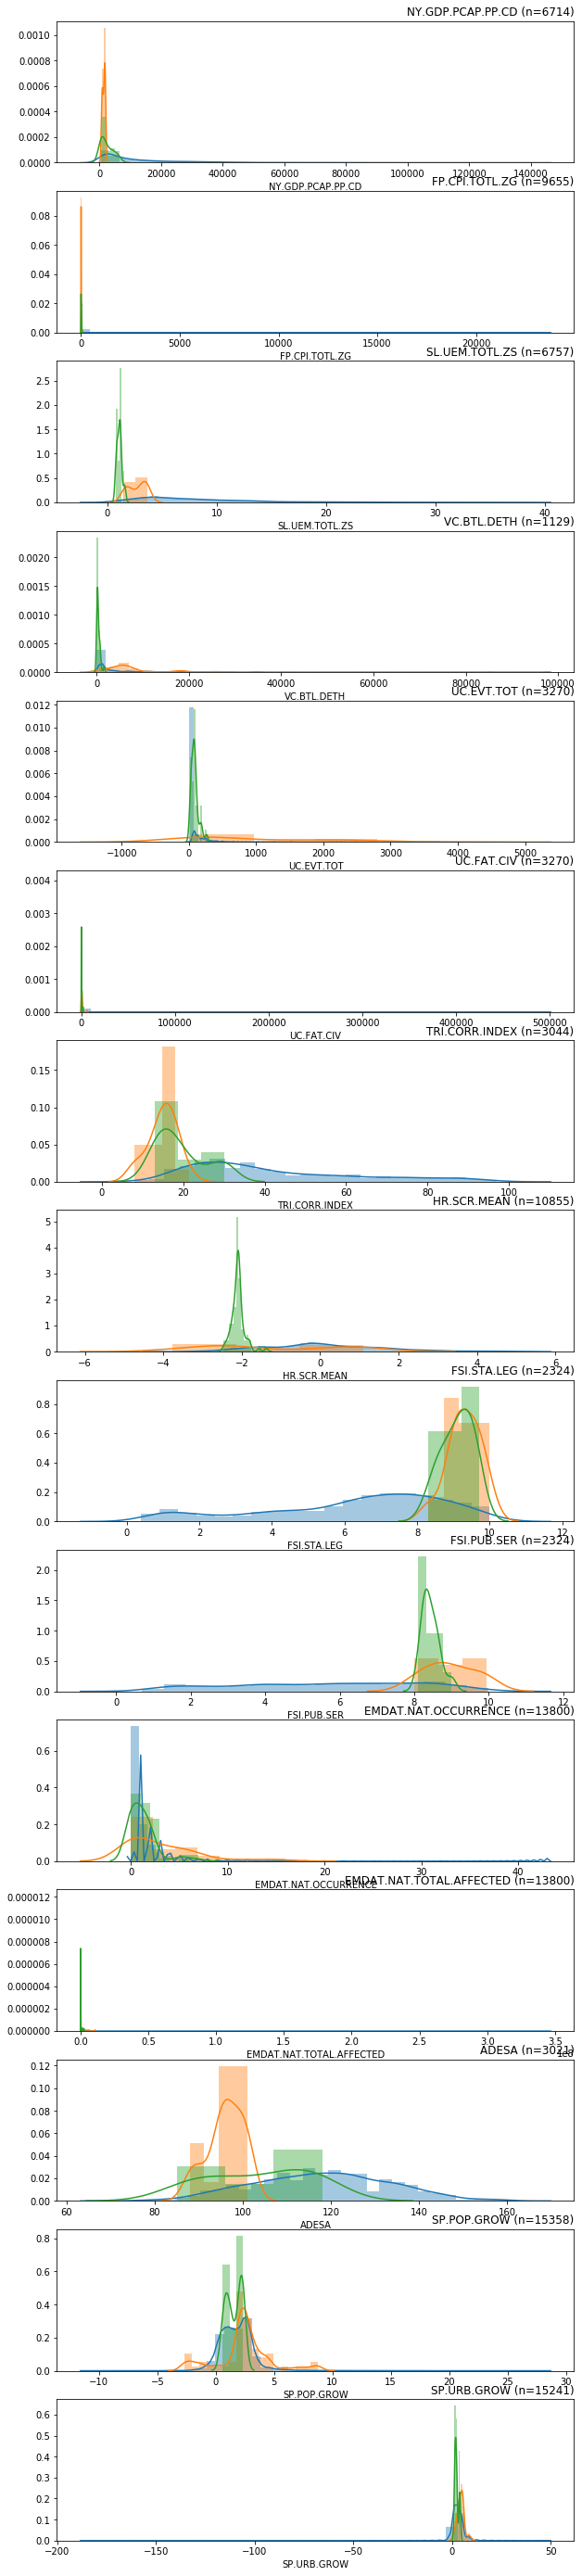

In [47]:
afg = 'AFG'
mmr = 'MMR'
f, axarr = plt.subplots(len(INDICATORS), figsize=(10, 50), sharex=False)


for i, idx in enumerate(INDICATORS):
    
    c1 = data['Country Code'] == afg
    c2 = data['Country Code'] == mmr
    y2 = data.loc[c1, idx]
    y3 = data.loc[c2, idx]
    y = data[idx]
    y.dropna(how='any', inplace=True)
    sns.distplot(y, ax=axarr[i], label='all')
    sns.distplot(y2, ax=axarr[i], label='AFG')
    sns.distplot(y3, ax=axarr[i], label='MMR')

    axarr[i].set_title("{} (n={})".format(idx, len(y)), loc='right')
    

In [49]:
CLUSTERS

[{'theme': 'Economy',
  'indicators': [{'code': 'NY.GDP.PCAP.PP.CD',
    'description': 'GDP per capita, PPP (current international $)',
    'direction-improvement': 'higher'},
   {'code': 'FP.CPI.TOTL.ZG',
    'description': 'Inflation, consumer prices (annual %)',
    'direction-improvement': 'lower'},
   {'code': 'SL.UEM.TOTL.ZS',
    'description': 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'direction-improvement': 'lower'}]},
 {'theme': 'Conflict',
  'indicators': [{'code': 'VC.BTL.DETH',
    'description': 'Battle-related deaths (number of people)',
    'direction-improvement': 'lower'},
   {'code': 'UC.EVT.TOT',
    'description': 'UCDP Number of conflict events per year',
    'direction-improvement': 'lower'},
   {'code': 'UC.FAT.CIV',
    'description': 'UCDP annual number of civilian fatalities',
    'direction-improvement': 'lower'}]},
 {'theme': 'Governance',
  'indicators': [{'code': 'TRI.CORR.INDEX',
    'description': 'Transparency Intl. C

In [26]:
list(set(df.columns) - set(df2.columns))

['B']

In [28]:
f = ['B', 'A']
df[f]

,B,A
0,None,1
1,None,2
2,None,3
